<a href="https://colab.research.google.com/github/Mansouraran/AI-projects/blob/main/Models_Save_Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Sequential and Functioanl API Model then (Save and Load) Functional API

## Here we create 2 Models the first one is Sequentioal and the other one is Functional. Both are the same but different ways

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import json

### Sequential API

In [ ]:
model1_sequential = keras.Sequential([
    layers.Dense(3, activation='relu', input_shape=(3,)),
    layers.Dense(1, activation='sigmoid'),
])

model1_sequential.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

### Functional API

In [ ]:
# functional way without the first layer, you must write (input layer). Here we have 3 layers (input, layer1, output)
input = layers.Input(shape=(3,))                         # don't mention input layer for the first layer
layer1 = layers.Dense(3, activation='relu')(input)       # mention input layer here is (input)
output = layers.Dense(1, activation='sigmoid')(layer1)   # mention input layer here is (layer1)

model1_functional = keras.Model(inputs = input ,outputs = output)

model1_functional.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

## Here we create a complex Functional API Model
### we have:



*   2 inputs
*   3 layers
*   2 outputs

In [ ]:
input1 = layers.Input(shape=(3,),name='input1')
input2 = layers.Input(shape=(5,),name='input2')

contact1 = layers.Concatenate()([input1, input2])

layer1 = layers.Dense(3, activation='relu')(contact1)
layer2 = layers.Dense(5, activation='relu')(layer1)

contact2 = layers.Concatenate()([layer1, layer2])

layer3 = layers.Dense(3, activation='relu')(contact2)

output1 = layers.Dense(1, activation='sigmoid')(layer3)
output2 = layers.Dense(1, activation='sigmoid')(layer3)

model2_functional = keras.Model(inputs=[input1, input2], outputs=[output1, output2], name='MyModel')

model2_functional.summary()


Model: "MyModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 8)              │              0 │ input1[0][0],          │
│                           │                        │                │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 3)              │             27 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 5)              │             20 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 8)              │              0 │ dense[0][0],           │
│ (Concatenate)             │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 3)              │             27 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │              4 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │              4 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 82 (328.00 B)

 Trainable params: 82 (328.00 B)

 Non-trainable params: 0 (0.00 B)

## Save model's architecture

In [ ]:
# here we save architeture of model into a variable
model_config = model1_functional.get_config()       # save it as a dictionary file then save as a json file

with open('model_config.json','w') as f:            # save as a json file.
  json.dump(model_config, f, indent=4)              # we can find on the right corner then double click on it to open, and 'indent' is to see codes in many lines.


## Save model's weights  

In [ ]:
# there are 3 ways to save weights:
#model1_functional.save_weights('model_weights) # This line caused the error. Change it to the line below
model1_functional.save_weights('model_weights.weights.h5')
# model1_functional.save_weights('model_weights.h5') # This is also valid for saving weights in HDF5 format
model1_functional.save_weights('model_weights.keras.weights.h5') # This is also valid for saving weights in the Keras format %%

## Save architecture and weights of model

In [ ]:
#model1_functional.save('model') it has an error
model1_functional.save('model.h5')
model1_functional.save('model.keras')



## Load model's architecture

*   Now we need to choose Runtime then select disconnect and delete runtime after that download file h5, model,... then drag and drug into files folder the run these codes down.




In [ ]:
# we need to run libs from first cell then run this cell.

with open ('model_config.json','r') as f:       # load model_config
  model_config = json.load(f)

model1_functional_a = keras.Model.from_config(model_config)       # this model a functional model then we use 'keas.Model.from_config()'

model1_functional_a.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

## Load model's weights

In [ ]:
model1_functional_a.load_weights('model_weights.keras.weights.h5')

## Load full model

In [ ]:
model1_functional_b = keras.models.load_model('model.h5')
model1_functional_b.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

## Plot Model

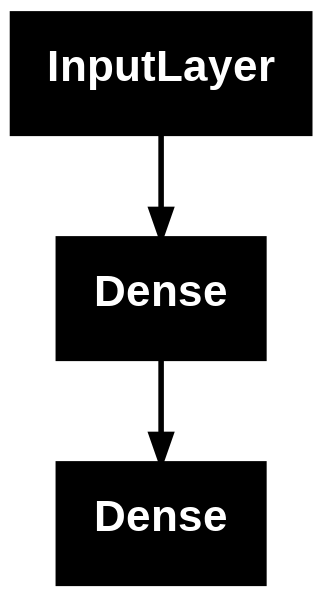

In [ ]:
# Here you get to see graphic output of your model
keras.utils.plot_model(model1_functional_a, to_file='Mymodel.png')

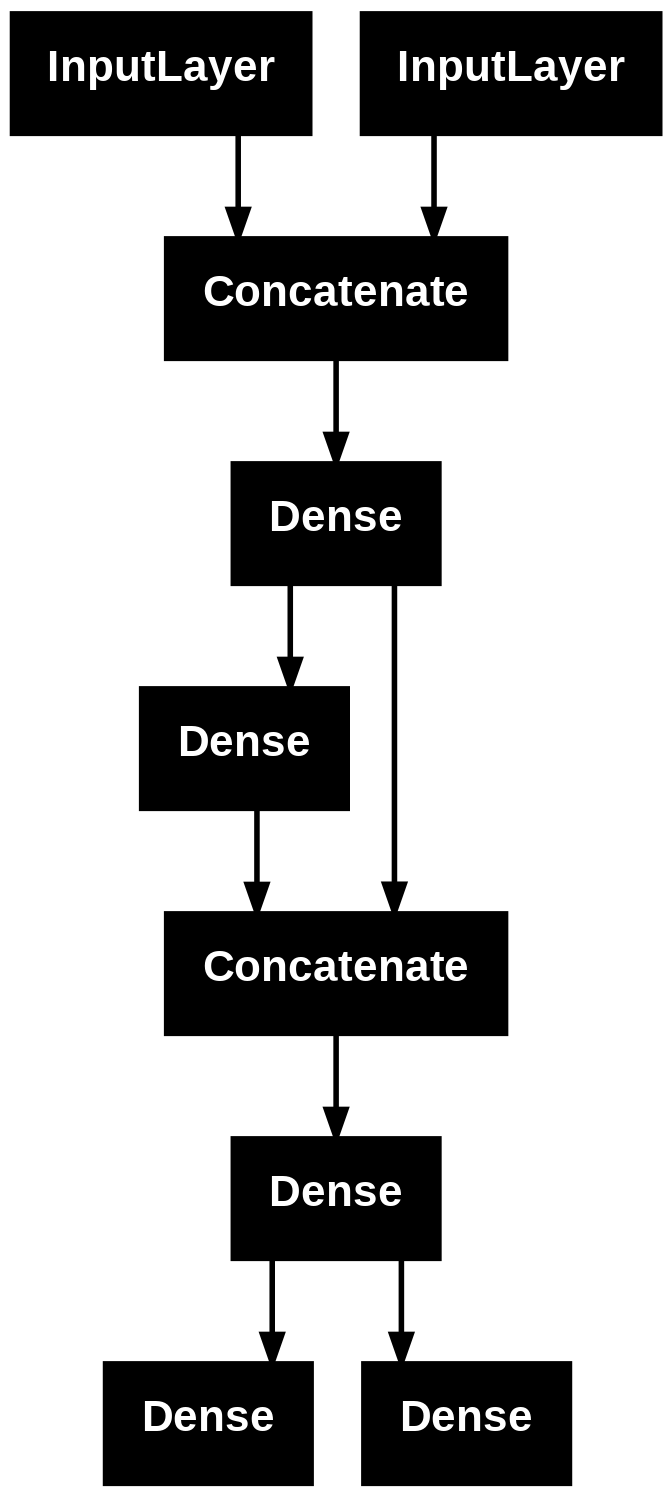

In [ ]:
keras.utils.plot_model(model2_functional, 'Model_2.png')

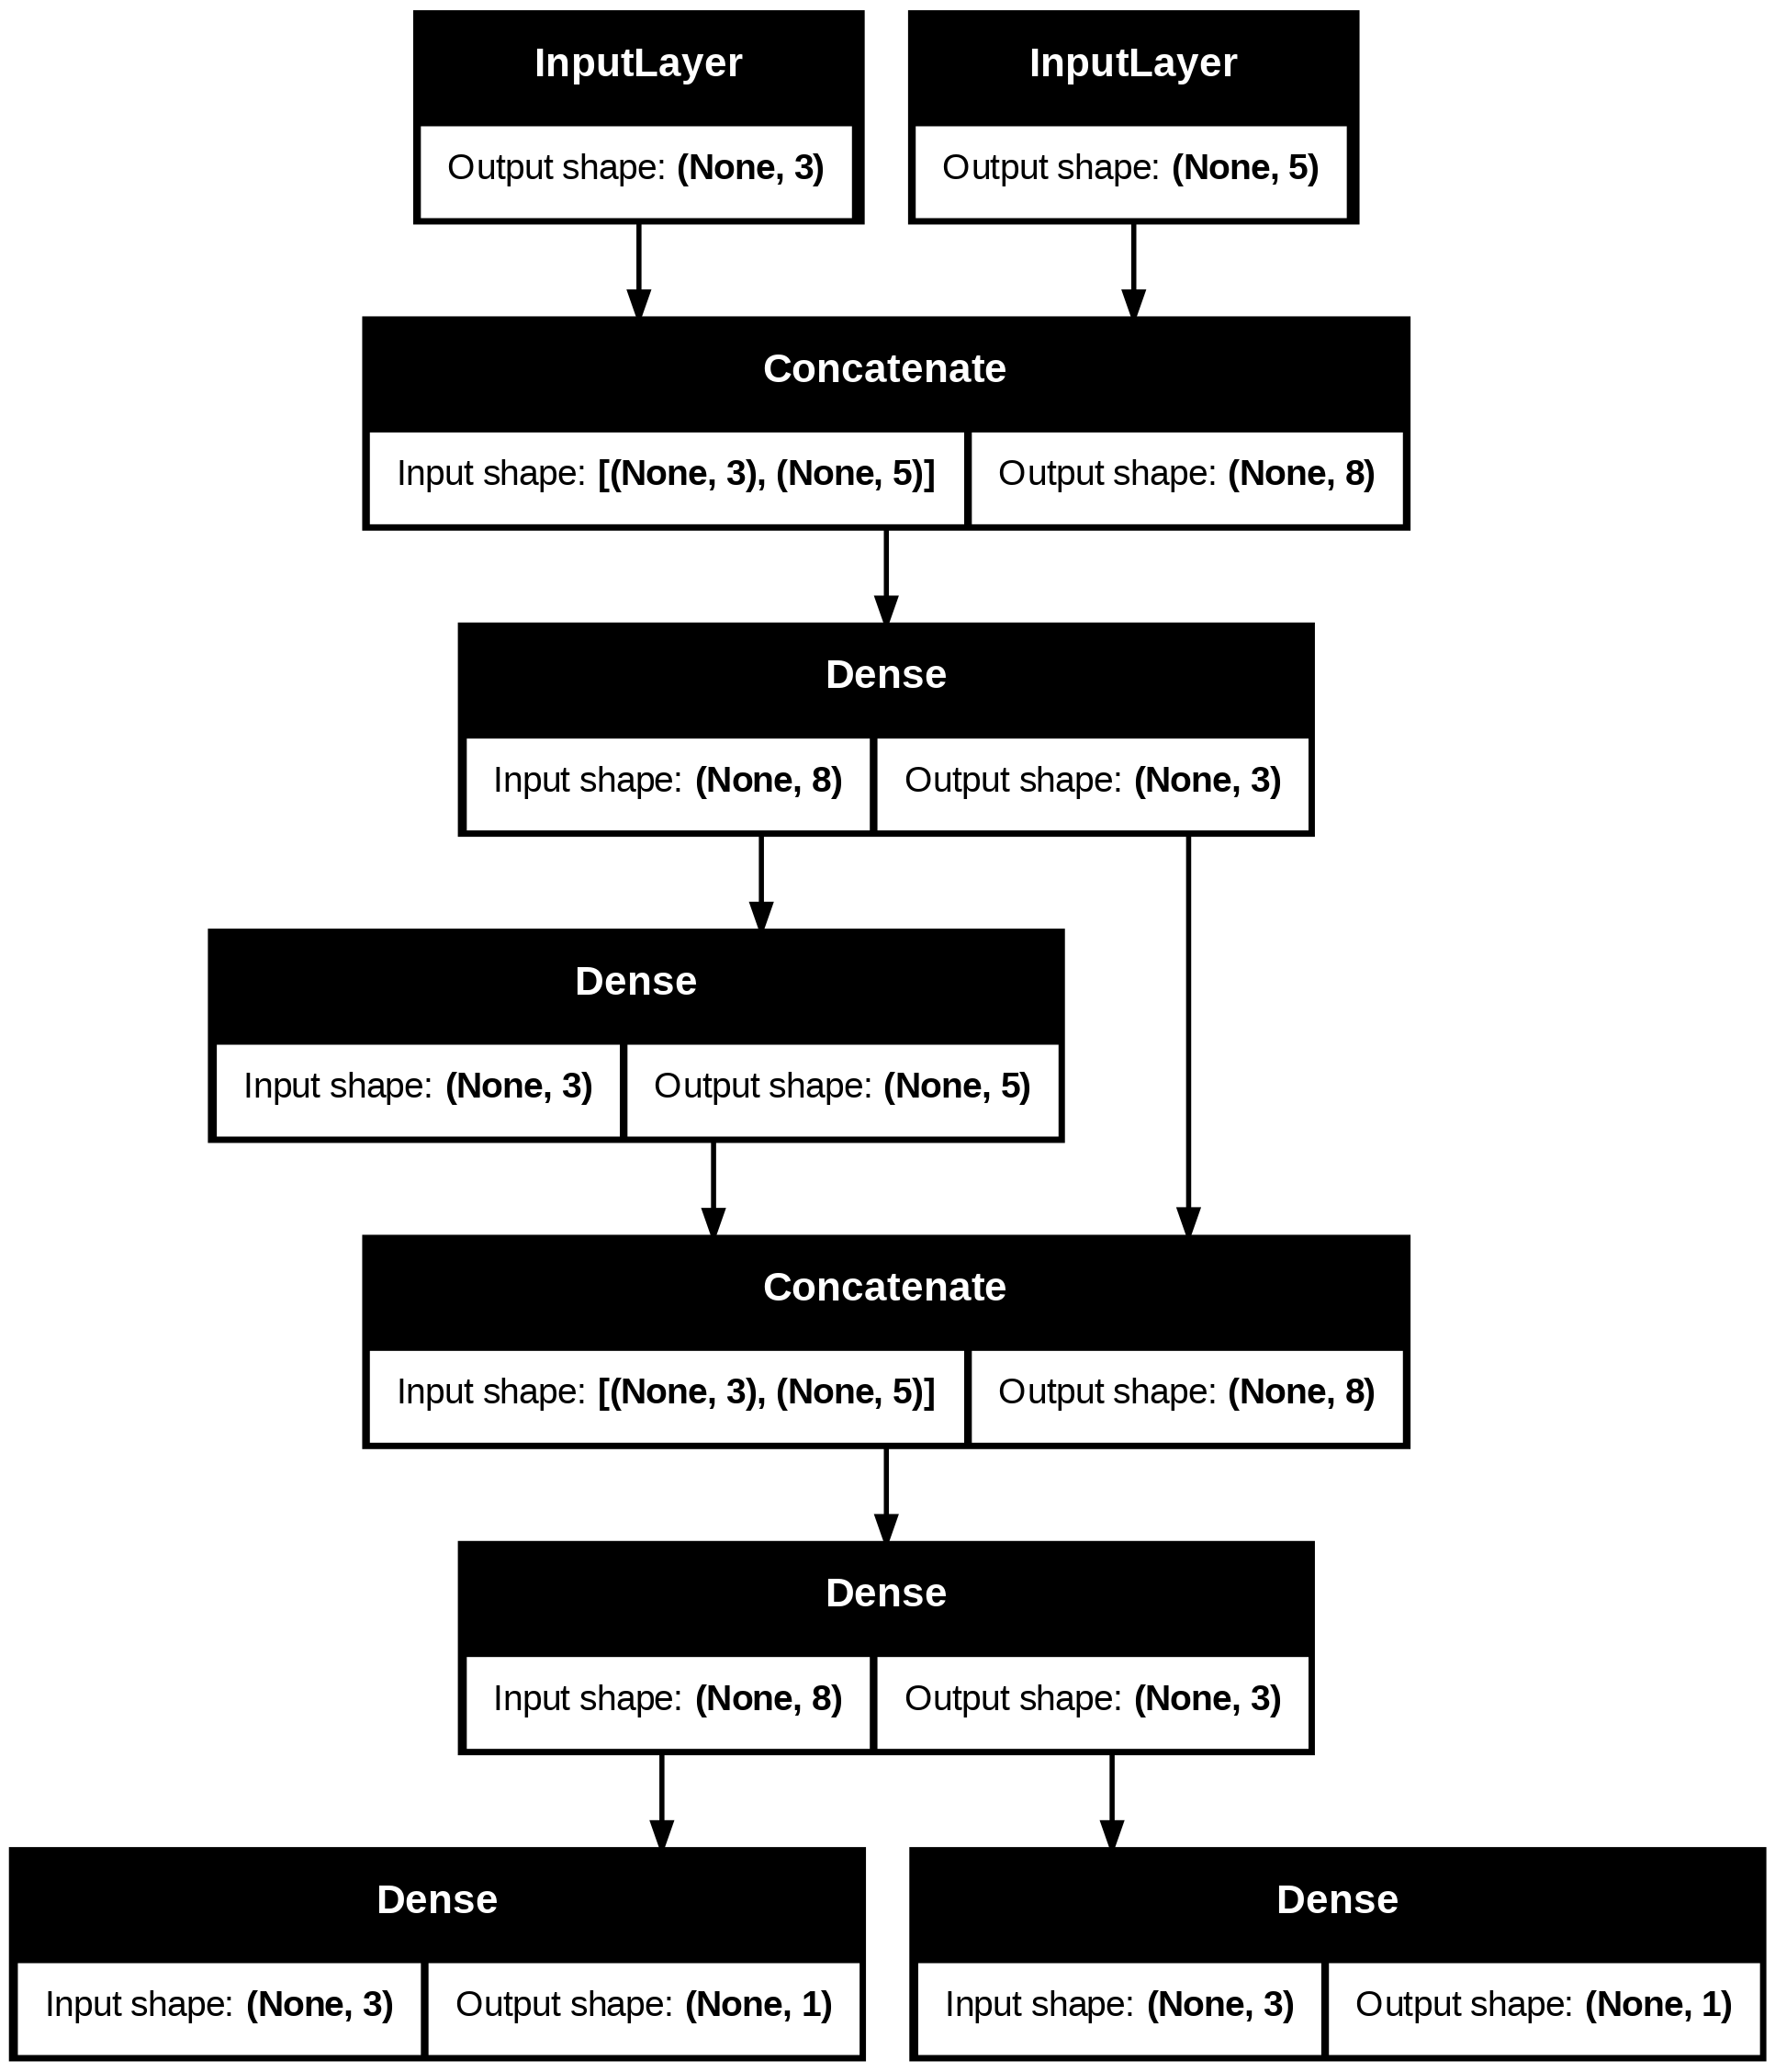

In [ ]:
# here we can add other features to show into line code below.
keras.utils.plot_model(model2_functional, 'Model_2.png', show_shapes=True) # you get to see inputs and outputs of each layer.